# Plot Training Logs : CarRace-PPO 🏎️🏁🏆

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import json

##### Listing the available files

**Note** : Some of them will be labeled "continuous", they use the continuous model.

In [51]:
files = glob.glob('../models/PPO_CarRacing*_log.csv')
for no, file in enumerate(files):
    fname = file.replace('_', ' ')
    print(f"{no:2d} | {fname}")

 0 | ../models\PPO Carracing mb 24-08-13 17-11 log.csv


In [52]:
choice = -1 # Make your choice here

##### Printing the hyperparameters

In [53]:
continuous = False
print('Hyperparameters \n' + '-'*40)
with open(files[choice].replace('log.csv','prms.json')) as jfile:
    prms = json.load(jfile)
    for key, val in prms.items():
        print(f'{key:>30s} : {val}')

if 'continuous' in files[choice].lower():
    continuous = True

print(f'{"CONTINUOUS":>30s} : {continuous}')

Hyperparameters 
----------------------------------------
                     MAX_STEPS : 10000000
                        N_IMGS : 3
                        N_IDLE : 3
                  N_START_SKIP : 30
                         GAMMA : 0.9
                     N_FILTERS : 16
                  DROPOUT_RATE : 0
                      ACTOR_LR : 0.001
                     CRITIC_LR : 0.002
                      L2_ALPHA : 0
            SCHEDULER_PATIENCE : 200
              SCHEDULER_MIN_LR : 0.0001
              SCHEDULER_FACTOR : 0.5
                   BUFFER_SIZE : 1000
                MINIBATCH_SIZE : 64
                 UPDATE_EPOCHS : 5
                  ENTROPY_BETA : 0.0001
                   CRITIC_BETA : 0.5
                  PPO_CLIP_VAL : 0.2
                    CONTINUOUS : False


##### Plotting the data

In [54]:
df = pd.read_csv(files[choice])

In [55]:
df

,episode,step,time,cum_reward,a_loss,c_loss,e_loss,action_0,action_1,action_2,action_3,action_4,lr
0,0,1001,8.896264,-45.484848,0.000000,0.000000,0.000000,0.225309,0.216049,0.166667,0.197531,0.194444,0.001
1,1,1001,17.905226,-41.444444,0.000000,0.000000,0.000000,0.212963,0.203704,0.206790,0.169753,0.206790,0.001
2,2,1001,27.065784,-71.025974,0.000000,0.000000,0.000000,0.166667,0.185185,0.256173,0.157407,0.234568,0.001
3,3,1001,36.534521,-23.229508,-0.020800,3.563577,0.000160,0.219136,0.203704,0.179012,0.243827,0.154321,0.001
4,4,1001,45.212365,-62.277778,-0.020800,3.563577,0.000160,0.268519,0.216049,0.185185,0.194444,0.135802,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,1001,1022.227721,881.798587,-0.014916,22.545210,0.000108,0.040123,0.111111,0.194444,0.648148,0.006173,0.001
104,104,1001,1038.707864,580.777778,-0.010653,32.159983,0.000082,0.061728,0.092593,0.222222,0.620370,0.003086,0.001
105,105,1001,1054.114861,343.129450,-0.010653,32.159983,0.000082,0.111111,0.163580,0.219136,0.481481,0.024691,0.001
106,106,1001,1069.303927,876.782772,-0.010653,32.159983,0.000082,0.033951,0.067901,0.179012,0.712963,0.006173,0.001


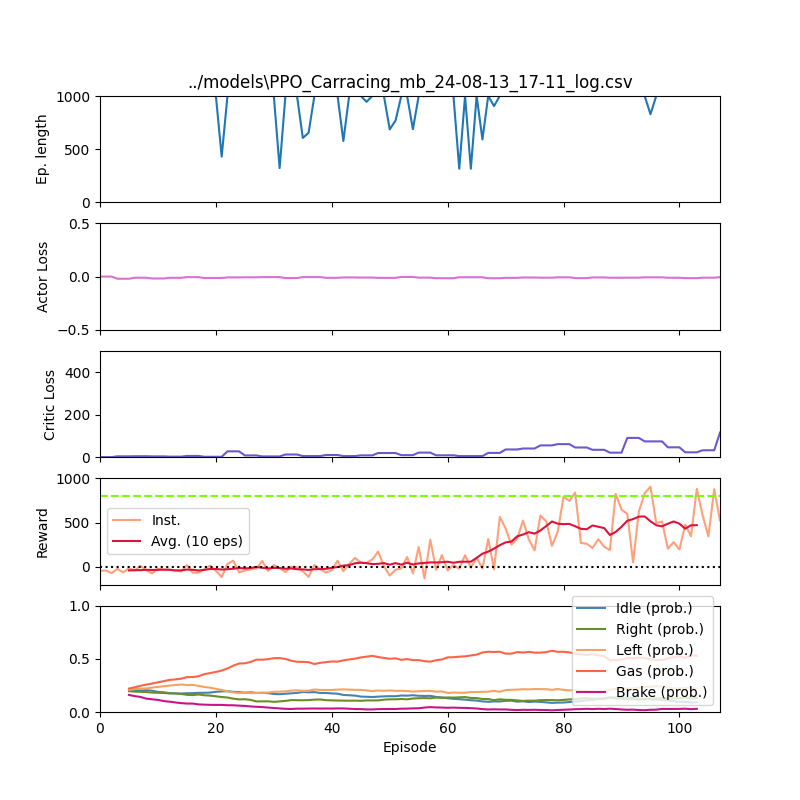

In [56]:
%matplotlib widget

fig, axes = plt.subplots(nrows=5, sharex=True, figsize=[8,8])

axes[0].plot(df['episode'], df['step'])
axes[1].plot(df['episode'], df['a_loss'], color='orchid')
axes[2].plot(df['episode'], df['c_loss'], color='slateblue')
axes[3].plot(df['episode'], df['cum_reward'], color='lightsalmon', label='Inst.')
axes[3].plot(df['episode'], df['cum_reward'].rolling(10, center=True).mean(), color='crimson', label='Avg. (10 eps)')

if continuous: 
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Main Engine (avg)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='tomato', label='Side Engine (avg)')
    axes[4].set_ylim([-2,2])
else:
    axes[4].plot(df['episode'], df['action_0'].rolling(10, center=True).mean(), color='steelblue', label='Idle (prob.)')
    axes[4].plot(df['episode'], df['action_1'].rolling(10, center=True).mean(), color='olivedrab', label='Right (prob.)')
    axes[4].plot(df['episode'], df['action_2'].rolling(10, center=True).mean(), color='sandybrown', label='Left (prob.)')
    axes[4].plot(df['episode'], df['action_3'].rolling(10, center=True).mean(), color='tomato', label='Gas (prob.)')
    axes[4].plot(df['episode'], df['action_4'].rolling(10, center=True).mean(), color='mediumvioletred', label='Brake (prob.)')
    axes[4].set_ylim([0,1])

# Formatting
axes[3].plot(df['episode'], np.zeros_like(df['cum_reward']), 'k:')
axes[3].plot(df['episode'], 800 * np.ones_like(df['cum_reward']), '--', color='lawngreen')
axes[0].set_ylabel('Ep. length')
axes[1].set_ylabel('Actor Loss')
axes[2].set_ylabel('Critic Loss')
axes[3].set_ylabel('Reward')
axes[3].legend()
axes[4].legend()

axes[0].set_ylim([0, 1000])
axes[1].set_ylim([-0.5,0.5])
axes[2].set_ylim([0,500])
axes[3].set_ylim([-200,1000])

axes[0].set_title(files[choice])
axes[4].set_xlim([0, df['episode'].max()])
axes[4].set_xlabel('Episode')


fig.savefig(files[choice].replace('log.csv','fig.png'))

In [57]:
df

,episode,step,time,cum_reward,a_loss,c_loss,e_loss,action_0,action_1,action_2,action_3,action_4,lr
0,0,1001,8.896264,-45.484848,0.000000,0.000000,0.000000,0.225309,0.216049,0.166667,0.197531,0.194444,0.001
1,1,1001,17.905226,-41.444444,0.000000,0.000000,0.000000,0.212963,0.203704,0.206790,0.169753,0.206790,0.001
2,2,1001,27.065784,-71.025974,0.000000,0.000000,0.000000,0.166667,0.185185,0.256173,0.157407,0.234568,0.001
3,3,1001,36.534521,-23.229508,-0.020800,3.563577,0.000160,0.219136,0.203704,0.179012,0.243827,0.154321,0.001
4,4,1001,45.212365,-62.277778,-0.020800,3.563577,0.000160,0.268519,0.216049,0.185185,0.194444,0.135802,0.001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,103,1001,1022.227721,881.798587,-0.014916,22.545210,0.000108,0.040123,0.111111,0.194444,0.648148,0.006173,0.001
104,104,1001,1038.707864,580.777778,-0.010653,32.159983,0.000082,0.061728,0.092593,0.222222,0.620370,0.003086,0.001
105,105,1001,1054.114861,343.129450,-0.010653,32.159983,0.000082,0.111111,0.163580,0.219136,0.481481,0.024691,0.001
106,106,1001,1069.303927,876.782772,-0.010653,32.159983,0.000082,0.033951,0.067901,0.179012,0.712963,0.006173,0.001


In [58]:
import torch

In [59]:
s = torch.tensor([[1,2],[54,9]])
s = torch.tile(s, [10,1,1])
t = torch.tensor(np.arange(10)).unsqueeze(-1)
w = torch.tensor(np.array([1,0,0,1]))
w = torch.tile(w, [10,1])